### How to take labeled AnnData object and Calculate Gene Ditributions

In [238]:
import squidpy as sq
from hest import iter_hest
import matplotlib.pyplot as plt
import anndata as ad
import numpy as np

#### Get AnnData from SpatialliBD
* Using MISC1 for now sample 151676

In [ ]:
id  = 'MISC3'
sample = ad.read_h5ad(f"deepst/MISC3_151674/{id}.h5")
sample.obs.columns
c = 4
t = 0.5  # spatial clustering threshold


### Use Moran's I to calculate Spatially Variable Genes

np.int64(47)

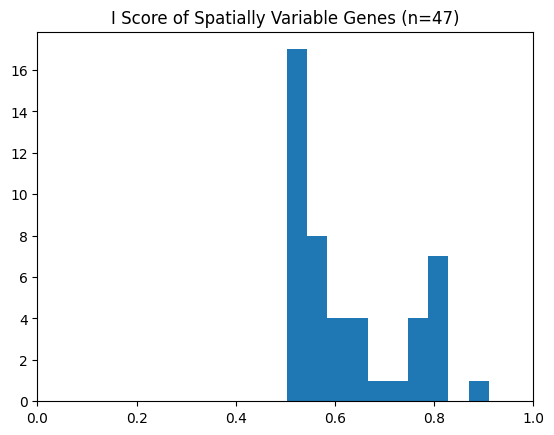

In [240]:
i_score = sample.uns['moranI']
genes_of_interest = i_score['I'] > t

plt.hist(i_score.loc[genes_of_interest,'I'])
plt.title(f"I Score of Spatially Variable Genes (n={genes_of_interest.sum()})")
plt.xlim((0,1))
genes_of_interest.sum()

### Use deepst 7 clusters

Text(0, 0.5, 'Clusters')

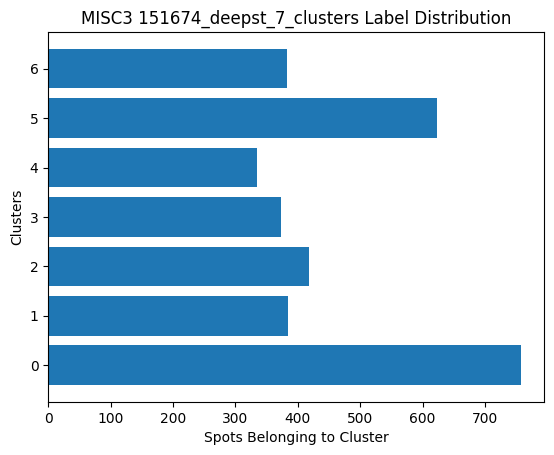

In [241]:
dst_7 = '151674_deepst_7_clusters.csv'
cluster_counts = sample.obs[dst_7].value_counts()
plt.barh(cluster_counts.index,cluster_counts)
plt.title(f"{id} {dst_7.split('.')[0]} Label Distribution")
plt.xlabel("Spots Belonging to Cluster")
plt.ylabel("Clusters")

### Plot Gene Counts

In [242]:
def plot_gene_dist(count_vector:np.ndarray,n_genes:int):
    plt.bar(list(range(count_vector.shape[0])),np.log(count_vector + 1))
    plt.xlabel("Gene ID")
    plt.ylabel(f"log(gene counts + 1)")
    plt.xlim((0,n_genes))

In [243]:
clust = sample.obs[dst_7] == c
# gene_counts = sample.X.toarray()


# clust_genes = sample.X.toarray()[clust,:][:,:].sum(axis = 0)
# plot_gene_dist(clust_genes,gene_counts.shape[0])
# plt.title(f"Cluster {c} Gene Count Distribution")



Text(0.5, 1.0, 'Cluster 4 Variable Gene Count Distribution')

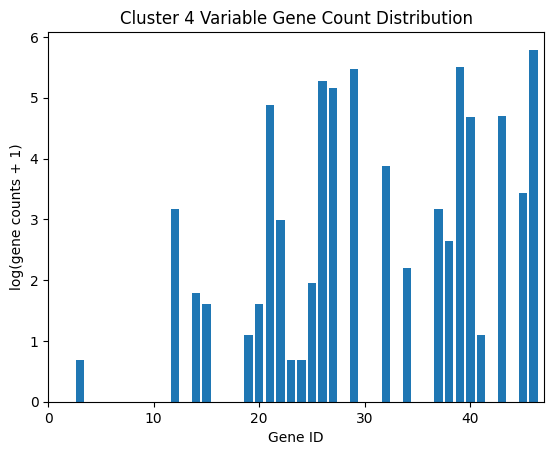

In [244]:
clust_var_genes = sample.X.toarray()[clust,:][:,genes_of_interest].sum(axis = 0)

plot_gene_dist(clust_var_genes,genes_of_interest.sum())
plt.title(f"Cluster {c} Variable Gene Count Distribution")
